<a href="https://colab.research.google.com/github/Steivann/tugas-data-mining/blob/main/%5BQuestion%5D_Exercise_Week_3_Pandas_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [2]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [3]:
#2
df.info()

#conclusion
# Data ini meiliki 10 kolom dan ada 6194 entries dan ada 2 data yang hilang yaitu kolom race dan admission.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [4]:
#3a
df_count = df['race'].value_counts(dropna=False)
print (df_count)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


In [5]:
#3b
df_count = df['admission'].value_counts(dropna=False)
print (df_count)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [6]:
#4
df['admission'].fillna('Deny', inplace=True)
df['race'].fillna('Other', inplace=True)

<ipython-input-6-4c52867b0f1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)
<ipython-input-6-4c52867b0f1c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

5. recheck missing value

In [7]:
#5
cek_missing = df.isnull().sum()
print (cek_missing)

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64


6. drop application_id column

In [8]:
# 6
df.drop('application_id', axis=1, inplace=True)
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,Female,True,3.30,Business,Other,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny


7. show describe column and conclude what the insight is from that column

In [9]:
#7
df.describe()

#conclusion
# tabel ini menjelaskan gambaran statistik yang jelas tentang GPA, skor GMAT, dan pengalaman kerja pelamar. Dan dapat memahami rata-rata kinerja pelamar dalam hal akademis dan pengalaman kerja mereka.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

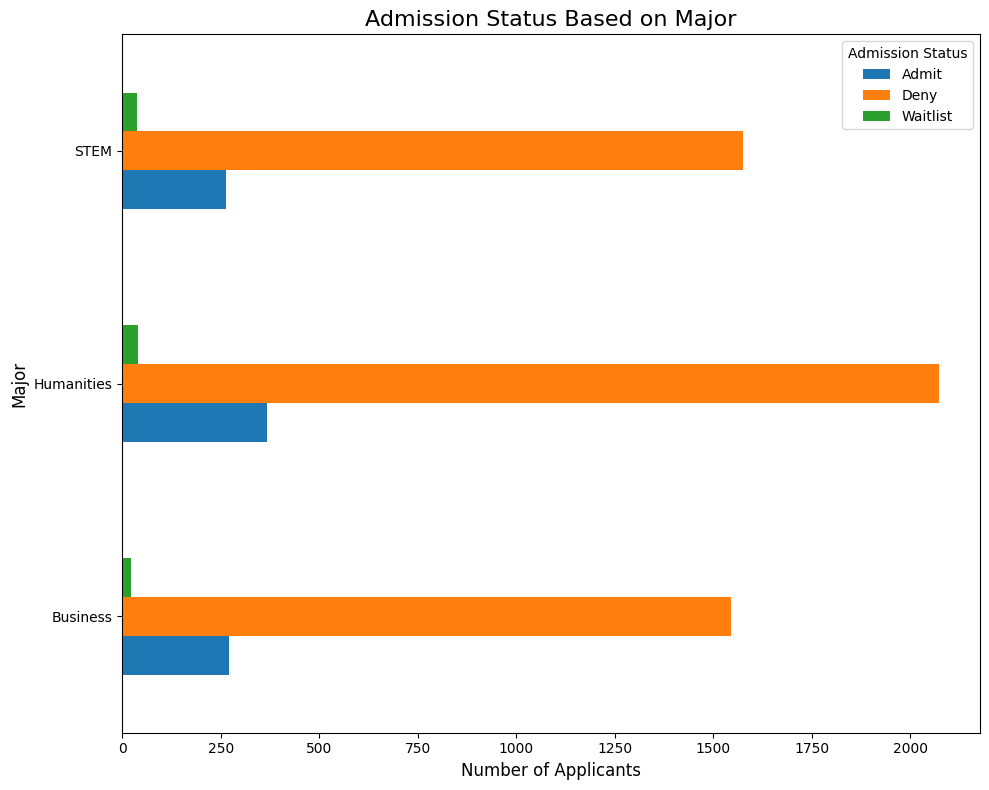

In [10]:
#8
admission_data = df.dropna(subset=['admission'])
admission_by_major = pd.crosstab(admission_data['major'], admission_data['admission'])
admission_by_major.plot(kind='barh', stacked=False, figsize=(10, 8))

plt.title('Admission Status Based on Major', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.legend(title='Admission Status')

plt.tight_layout()
plt.show()
# conclusion
# grafik menunjukkan seberapa banyak orang yang ditolak, waiting list dan sudah diterima. meliungkupi 3 jurusan yang berbeda yaitu STEM, HUmanities dan business.

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

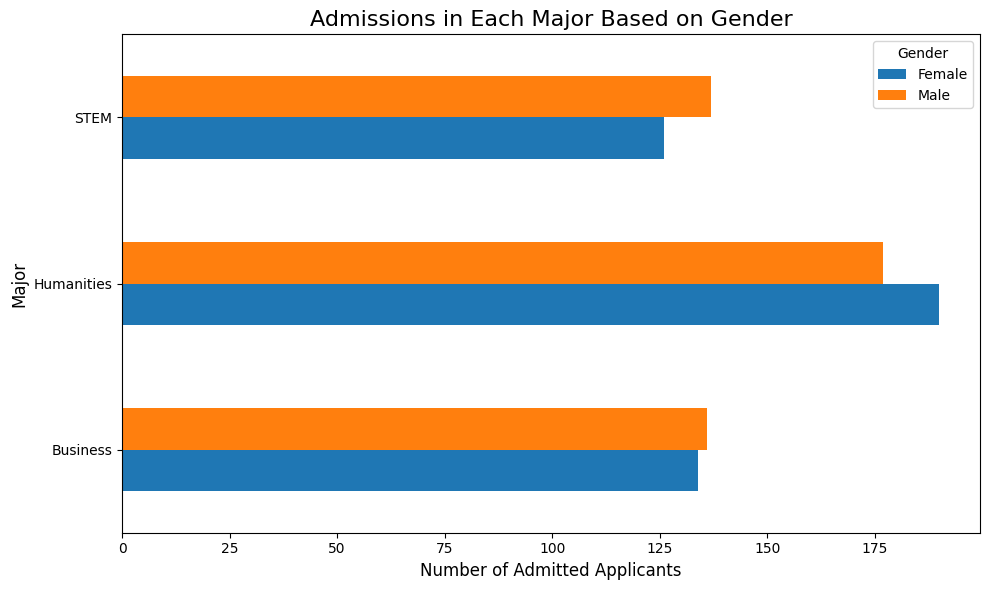

In [23]:

admission_data = df.dropna(subset=['admission'])

admitted_data = admission_data[admission_data['admission'] == 'Admit']

admission_by_major_gender = pd.crosstab(admitted_data['major'], admitted_data['gender'])

if admission_by_major_gender.empty:
    print("The crosstab is empty. Check your data for admissions.")
else:
    admission_by_major_gender.plot(kind='barh', stacked=False, figsize=(10, 6))
    plt.title('Admissions in Each Major Based on Gender', fontsize=16)
    plt.xlabel('Number of Admitted Applicants', fontsize=12)
    plt.ylabel('Major', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()

# Conclusion
# untuk melihat distribusi penerimaan kerja dan mengetahui penerimaannya berapa banyak pria dan wanita dari jurusan yang beragam.
# sumbu x untuk melihat jumblah pelamar yang diterima sebanyak apa pria dan wanitanya, sedangkan sumbu Y memiliki banyak kategori atau jurusan.


10. create your own insightful visualization and explain it in at least 2 sentences

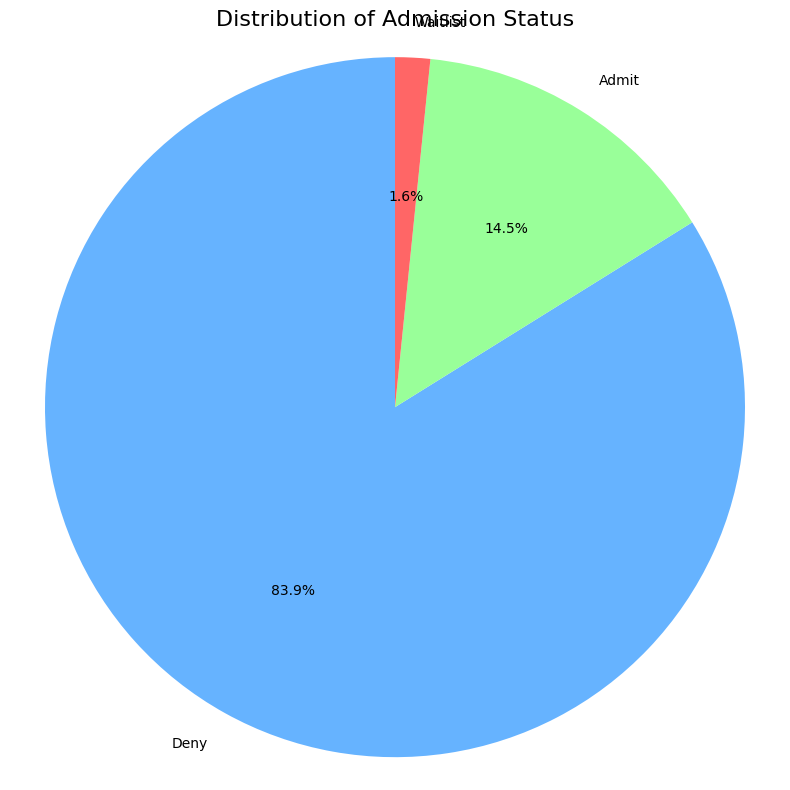

In [24]:
admission_data = df.dropna(subset=['admission'])
admission_status_counts = admission_data['admission'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(admission_status_counts, labels=admission_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ff6666'])
plt.title('Distribution of Admission Status', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Conclusion
# Pie chart yang saya buat ini bertujuan untuk mengetahui dan menganalisa secara keseluruhan untuk mengetahui informasi seberapa banyak para pelamar yang diterima, waitlist dan ditolak.

11. create your own insightful visualization and explain it in at least 2 sentences

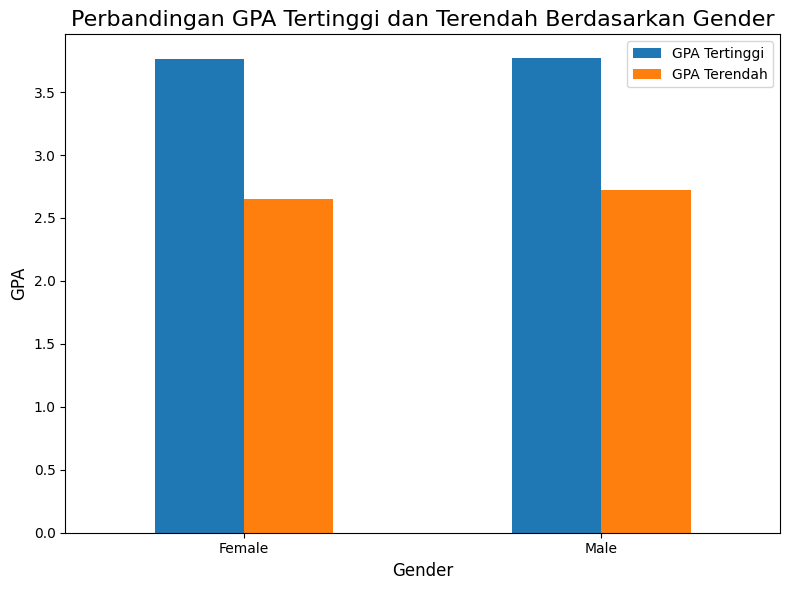

In [32]:

gpa_by_gender = df.groupby('gender')['gpa'].agg(['max', 'min'])

# Plot bar chart
gpa_by_gender.plot(kind='bar', figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])

# Setel judul dan label
plt.title('Perbandingan GPA Tertinggi dan Terendah Berdasarkan Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['GPA Tertinggi', 'GPA Terendah'])

# Tampilkan bar chart
plt.tight_layout()
plt.show()
#Conclusion
# bar chart untuk memvisualisasikan GPA tertinggi dan terendah di antara laki-laki dan perempuan dengan warna berbeda untuk kedua kategori.
# sumbu x itu menampilkan gender, y menampilkan nilai gpa dan 2 bar itu menunjukkan GPA terendah dan tertinggi

12. encode categorical columns and display the results

In [42]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

#encode X

X = df.drop('admission', axis=1)

columns = ['gender', 'international', 'major', 'race', 'work_industry']

label_encoders = {}
for col in columns:
    le = LabelEncoder()
    X[col] = LabelEncoder().fit_transform(X[col])
    label_encoders[col] = le

df[columns] = X[columns]

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


In [45]:
#12b
#encode y
df['admission'] = LabelEncoder().fit_transform(df['admission'])
y = df['admission']

df.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,1
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,1
4,1,0,3.35,2,2,590.0,5.0,1,1


13. create a heatmap to see the correlation and explain the conclusion

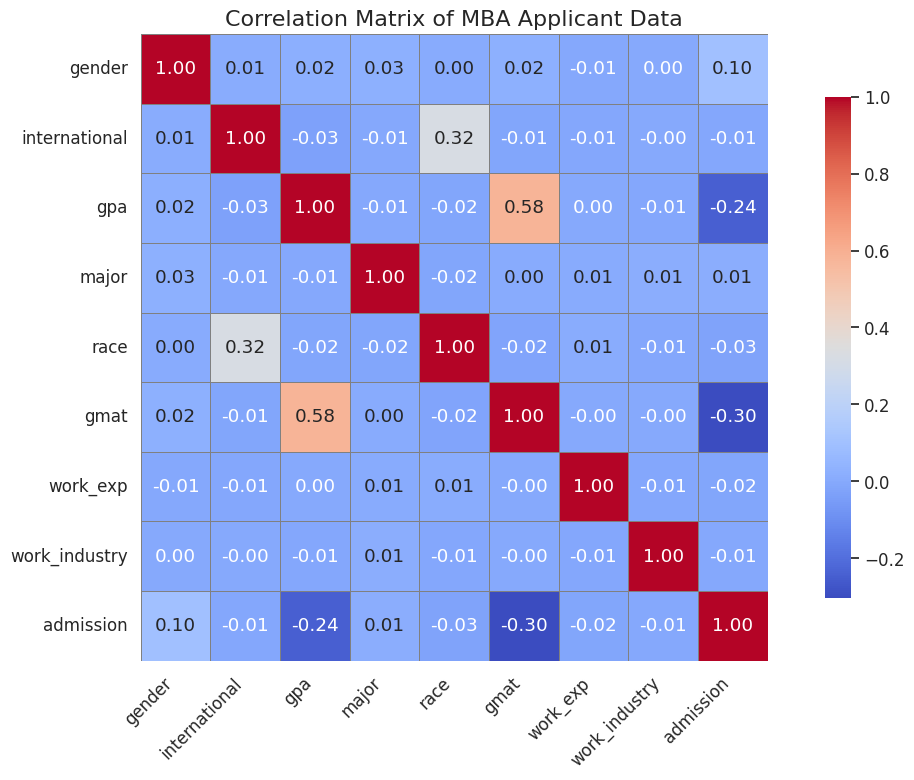

In [48]:
#13
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
                       cbar_kws={"shrink": .8}, linewidths=.5, linecolor='gray')
plt.title('Correlation Matrix of MBA Applicant Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#conclusion
# Analisis matriks korelasi mengungkapkan hubungan positif yang kuat antara GPA dan GMAT, menunjukkan bahwa pelamar dengan nilai akademis tinggi cenderung memiliki performa baik di ujian. Namun, terdapat korelasi negatif antara GPA dan status penerimaan, yang menunjukkan bahwa pelamar dengan GPA tinggi mungkin tidak selalu diterima.


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
average_gpa = df['gpa'].mean()

lisa_data = {
    'gender': 0,
    'international': 0,
    'gpa': average_gpa,
    'major': 0,
    'race': 0,
    'gmat': 580.0,
    'work_exp': 2,
    'work_industry': 3
}

X = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp','work_industry']]
y = df['admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


lisa_df = pd.DataFrame([lisa_data])

prediction = model.predict(lisa_df)

result = "Accepted" if prediction[0] == 1 else "Rejected"
print(f"Prediction for Lisa: {result}")

Accuracy: 0.7828894269572235
Prediction for Lisa: Accepted
